In [1]:

import pandas as pd
import seaborn as sns
import numpy as np

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv("stock_data.csv", encoding="ISO-8859-1")

In [3]:
#Step1  read Data set, check null values.
data.head()
#column label is a target label "1" indicates stock price will increase becuase of head line and "0" indicates stock price will decrease
#Top25 headline companies 

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [4]:
#check for null
print(data.isnull().sum())
print("Shape: ",data.shape)

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64
Shape:  (4101, 27)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4101 non-null   object
 1   Label   4101 non-null   int64 
 2   Top1    4101 non-null   object
 3   Top2    4101 non-null   object
 4   Top3    4101 non-null   object
 5   Top4    4101 non-null   object
 6   Top5    4101 non-null   object
 7   Top6    4101 non-null   object
 8   Top7    4101 non-null   object
 9   Top8    4101 non-null   object
 10  Top9    4101 non-null   object
 11  Top10   4101 non-null   object
 12  Top11   4101 non-null   object
 13  Top12   4101 non-null   object
 14  Top13   4101 non-null   object
 15  Top14   4101 non-null   object
 16  Top15   4101 non-null   object
 17  Top16   4101 non-null   object
 18  Top17   4101 non-null   object
 19  Top18   4101 non-null   object
 20  Top19   4101 non-null   object
 21  Top20   4101 non-null   object
 22  Top21   4101 non-null   

In [6]:
#splitting train and test dataset based on date
train =  data[data['Date'] < '20150101']
test = data[data['Date'] > '20141231']

In [7]:
train.shape

(3975, 27)

In [8]:
test.shape

(378, 27)

AxesSubplot(0.125,0.125;0.775x0.755)
****Balanced Data******
 1    2166
0    1935
Name: Label, dtype: int64


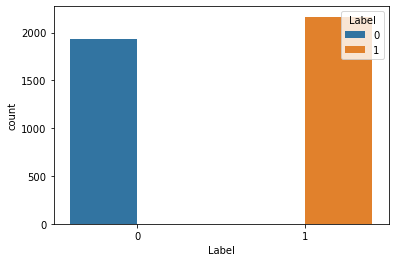

In [9]:
#Step2  lets find type of our data is it balanced or inbalanced?

print(sns.countplot(x='Label', data=data, hue='Label'))
#seems like we have balanced data set
print("****Balanced Data******\n",data.Label.value_counts())

In [10]:
#Step3 Feature engineering

#From independent feature
df_train = train.iloc[:,2:27]
#removing special charaters from each rows of the feature.which is not requried for our Ml model
#[^a-zA-z]   apart from this replace with space
df_train.replace("[^a-zA-z]"," ", regex=True, inplace=True)

#rename column names
df_train.columns = [str(ind) for ind in np.arange(0,25)]

In [11]:
df_train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')

In [12]:
#Step 4 NLP text preprocessing
#1.Now basic rules in NLP need to be followed like converting all the rows into smaller case
#because at the time of removing stopwpords, there should be matched word in stopwords model
#2.And if we use BOW, TF-IDF in this case with respectice to the features and the words if there is differecnt case then in that case both words will be treated as different.
#example Apple and apple both has different case, so will be treated as different.

for ind in  [str(ind) for ind in np.arange(0,25)]:
    df_train[ind] = df_train[ind].str.lower()
df_train.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [13]:
#Now in order to have a BOW or TF-IDF, we basically have to consider each particular row as a paragraph.
df_train.shape
headlines = []
#converting all top 25 feature values into paragraph
for row in range(0, len(df_train.index)):
    headlines.append(" ".join(str(row) for row in df_train.iloc[row,0:25]))
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

In [14]:
#Applying Bag of Word/ Implementation
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(ngram_range=(2,2))
train_dataset = count_vect.fit_transform(headlines)

In [15]:
#Step 5 Applying Random forest classifier
from sklearn.ensemble import RandomForestClassifier
random_classifer_model = RandomForestClassifier(n_estimators=200, criterion='entropy')
random_classifer_model.fit(train_dataset, train.Label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
#step 6 preparing test_data steps similar to train data


In [17]:
df_test = test.iloc[:,2:]
df_test.shape

(378, 25)

In [18]:
df_test.replace("[^a-zA-z]"," ", regex=True, inplace=True)

#rename column names
df_test.columns = [str(ind) for ind in np.arange(0,25)]
#lower case of testing dataset
for ind in  [str(ind) for ind in np.arange(0,25)]:
    df_test[ind] = df_test[ind].str.lower()
df_test.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
3723,most cases of cancer are the result of sheer b...,iran dismissed united states efforts to fight ...,poll one in germans would join anti muslim ...,uk royal family s prince andrew named in us la...,some asylum seekers refused to leave the bu...,pakistani boat blows self up after india navy ...,sweden hit by third mosque arson attack in a week,cars set alight during french new year,salaries for top ceos rose twice as fast as av...,norway violated equal pay law judge says jud...,...,ukrainian minister threatens tv channel with c...,palestinian president mahmoud abbas has entere...,israeli security center publishes names of ...,the year was the deadliest year yet in sy...,a secret underground complex built by the nazi...,restrictions on web freedom a major global iss...,austrian journalist erich mchel delivered a pr...,thousands of ukraine nationalists march in kiev,chinas new years resolution no more harvestin...,authorities pull plug on russia s last politic...


In [19]:
print(df_test.shape)
test_transform = []
#converting all top 25 feature values into paragraph
for row in range(len(df_test.index)):
    test_transform.append(" ".join(str(row) for row in df_test.iloc[row,0:25]))
test_transform[0]

(378, 25)


'most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles  diet or even inherited genes  new research suggests  random mutations that occur in dna when cells divide are responsible for two thirds of adult cancers across a wide range of tissues  iran dismissed united states efforts to fight islamic state as a ploy to advance u s  policies in the region   the reality is that the united states is not acting to eliminate daesh  they are not even interested in weakening daesh  they are only interested in managing it  poll  one in   germans would join anti muslim marches uk royal family s prince andrew named in us lawsuit over underage sex allegations some    asylum seekers refused to leave the bus when they arrived at their destination in rural northern sweden  demanding that they be taken back to malm or  some big city   pakistani boat blows self up after india navy chase  all four people on board the vessel from near the pakistani port city of karachi are bel

In [20]:
#Step 7 Now transform and predict for the test dataset
test_dataset = count_vect.transform(test_transform)

In [21]:
predicted = random_classifer_model.predict(test_dataset)

In [22]:
# step 8 Model accuracy check
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
c_matrix = confusion_matrix(test['Label'], predicted)
print(c_matrix)
acc_score = accuracy_score(test['Label'], predicted)
print(acc_score)
report = classification_report(test['Label'], predicted)
print(report)

[[135  51]
 [  6 186]]
0.8492063492063492
              precision    recall  f1-score   support

           0       0.96      0.73      0.83       186
           1       0.78      0.97      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378

